### Name: MANOJ G


### **Task 1**

## Prediction using Supervised ML (Level - Beginner)

## Predict the percentage of an student based on the no. of study hours.

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts

In [2]:
#Read the Data from the given links
url ="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
sm=study_marks=pd.read_csv(url)
sm.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


We can create the plot with the following script:

<function matplotlib.pyplot.show(*args, **kw)>

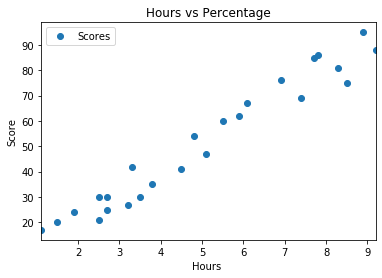

In [3]:
sm.plot(x="Hours",y="Scores",style="o")
plt.title('Hours vs Percentage')  
plt.xlabel('Hours ')  
plt.ylabel('Score')
plt.show

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**


In [4]:
x=sm[["Hours"]]
y=sm[["Scores"]]

 Split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [5]:
# Import train_test_split  as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=0) 

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [6]:
regr=LinearRegression(fit_intercept=True)
regr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

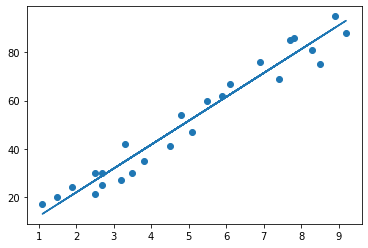

In [7]:
# Plotting the regression line
line = regr.coef_*x+regr.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

### **Making Predictions**

In [8]:
#Tessting data
x_test

,Hours
5,1.5
2,3.2
19,7.4
16,2.5
11,5.9


In [9]:
#Predicting the Score
y_pred=regr.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [10]:
data=pd.DataFrame({"Actual":y_test.values.flatten(),"Prediction":y_pred.flatten()})
data

,Actual,Prediction
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [11]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
Hours=np.array(9.25).reshape(1,-1)
result=regr.predict(Hours)
print("Hours of Study: ",np.asscalar(Hours))
print("Predicted Score :",np.asscalar(result))

Hours of Study:  9.25
Predicted Score : 93.69173248737538


### **Evaluating the model**
This step is particularly important to compare how well different algorithms
perform on a particular dataset.


In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
